In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive')

Mounted at /content/drive


In [2]:
!pip install spacy
!python -m spacy download en_core_web_md


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-10 18:58:09.394226: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-10 18:58:09.456464: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 18:58:10.511475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/4

In [3]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import spacy
from torchtext.data import get_tokenizer
import numpy as np
def load_yelp_data(json_file, nrows=None):
    data = []
    with open(json_file, encoding='utf-8') as file:
        for i, line in enumerate(file):
            if nrows and i >= nrows:
                break
            data.append(json.loads(line))
    return pd.DataFrame(data)

data = load_yelp_data('/content/drive/MyDrive/Individual Project/yelp/yelp_academic_dataset_review.json', nrows=50000)

filtered_data = data[(data['stars'] <= 2) | (data['stars'] >= 4)]
filtered_data['sentiment'] = filtered_data['stars'].apply(lambda x: 'negative' if x <= 2 else 'positive')

train_data, temp_data = train_test_split(filtered_data, test_size=0.3, random_state=42, stratify=filtered_data['sentiment'])
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['sentiment'])

nlp = spacy.load('en_core_web_md')

def get_sentence_embedding_spacy(sentence):
    return nlp(sentence).vector

X_train = np.array([get_sentence_embedding_spacy(text) for text in train_data['text']])
y_train = train_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values
X_val = np.array([get_sentence_embedding_spacy(text) for text in val_data['text']])
y_val = val_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values
X_test = np.array([get_sentence_embedding_spacy(text) for text in test_data['text']])
y_test = test_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_val_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy:", val_accuracy)
print(classification_report(y_val, y_val_pred))

y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)
print(classification_report(y_test, y_test_pred))


<ipython-input-3-0b9e4af6e18c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment'] = filtered_data['stars'].apply(lambda x: 'negative' if x <= 2 else 'positive')


Validation accuracy: 0.9172683513838749
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1407
           1       0.94      0.96      0.95      5241

    accuracy                           0.92      6648
   macro avg       0.89      0.86      0.87      6648
weighted avg       0.92      0.92      0.92      6648

Test accuracy: 0.923296736351331
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1408
           1       0.94      0.96      0.95      5241

    accuracy                           0.92      6649
   macro avg       0.90      0.87      0.88      6649
weighted avg       0.92      0.92      0.92      6649



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch: 01 | Epoch Time: 0m 1s
	Train Acc: 92.60%
	 Val. Acc: 91.73%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch: 02 | Epoch Time: 0m 1s
	Train Acc: 92.60%
	 Val. Acc: 91.73%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch: 03 | Epoch Time: 0m 1s
	Train Acc: 92.60%
	 Val. Acc: 91.73%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch: 04 | Epoch Time: 0m 0s
	Train Acc: 92.60%
	 Val. Acc: 91.73%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch: 05 | Epoch Time: 0m 0s
	Train Acc: 92.60%
	 Val. Acc: 91.73%


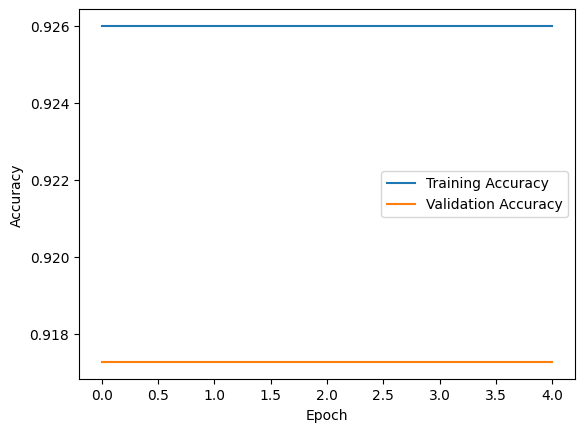

Accuracy: 92.33%
Precision: 94.11%
Recall: 96.30%
F1 Score: 95.19%
[[1092  316]
 [ 194 5047]]
[[0.77556818 0.22443182]
 [0.03701584 0.96298416]]


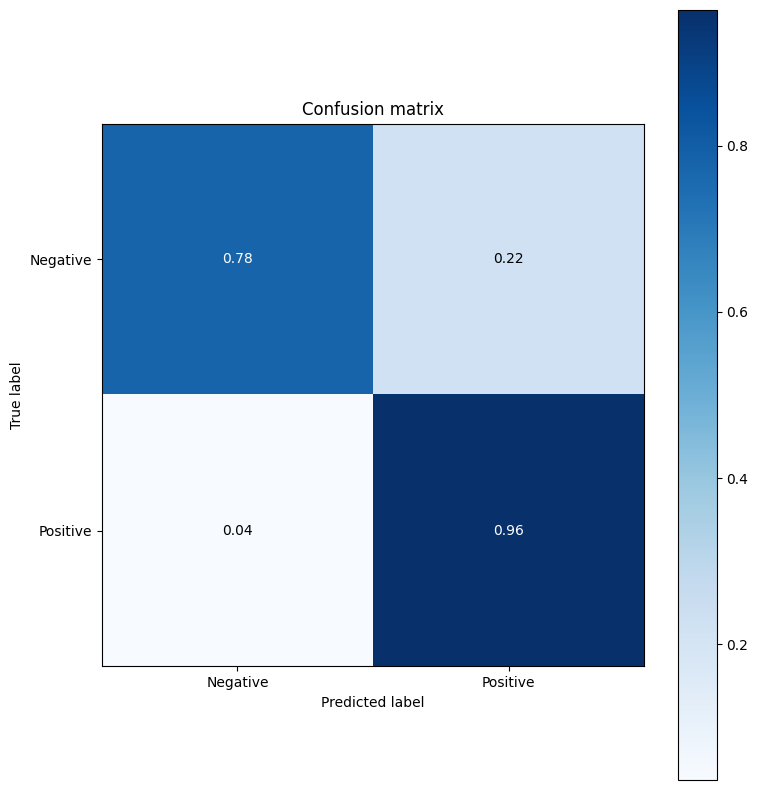

In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import normalize


def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs


N_EPOCHS = 5
train_acc_history = []
valid_acc_history = []

for epoch in range(N_EPOCHS):

    start_time = time.time()

    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    train_acc = clf.score(X_train, y_train)
    valid_acc = clf.score(X_val, y_val)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Acc: {valid_acc*100:.2f}%')

    train_acc_history.append(train_acc)
    valid_acc_history.append(valid_acc)

# Plot accuracy history
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(valid_acc_history, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_test_preds = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_test_preds)
precision = precision_score(y_test, y_test_preds)
recall = recall_score(y_test, y_test_preds)
f1 = f1_score(y_test, y_test_preds)

print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')
print(f'F1 Score: {f1*100:.2f}%')

cm = confusion_matrix(y_test, y_test_preds)

print(cm)
cm_norm = normalize(cm, axis=1, norm='l1')
print(cm_norm)
labels = ['Negative', 'Positive']
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=labels, yticklabels=labels,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

thresh = cm_norm.max() / 2.
for i in range(cm_norm.shape[0]):
    for j in range(cm_norm.shape[1]):
        ax.text(j, i, format(cm_norm[i, j], '.2f'),
                ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()


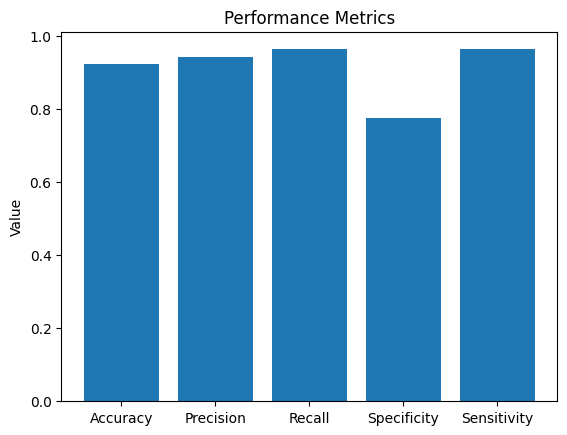

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the assessment indicators from confusion matrix
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
sensitivity = recall

# Putting indicators into arrays for plotting
ind = np.arange(5)
vals = [accuracy, precision, recall, specificity, sensitivity]
labels = ['Accuracy', 'Precision', 'Recall', 'Specificity', 'Sensitivity']

# Plotting bar charts
plt.bar(ind, vals)
plt.xticks(ind, labels)
plt.ylabel('Value')
plt.title('Performance Metrics')
plt.show()
